#Part I: Data Munging

<b>Data Sources:</b>
<ul>
<li>Inaugural Addresses and States of the Union: Project Gutenberg</li>
<li>[Presidential Data](http://www.infoplease.com/ipa/A0194030.html): Infoplease</li>
<li>[Presidential Rankings](https://en.wikipedia.org/wiki/Historical_rankings_of_Presidents_of_the_United_States#Five_Thirty_Eight_analysis): Wikipedia/538</li>
</ul>

Structured data can be found [here](https://docs.google.com/spreadsheets/d/1cujFV5JLRivY-k6LMEDCP8_zapHUtwNCdb9Qr8h2gOQ/edit#gid=0).

###<i>Step 1: Parsing Speech Text</i>

First, let's import all the packages we'll need to clean the data:
<ul>
<li><code>re</code> for regular expression functions</li>
<li><code>pprint</code> to make printing more readable</li>
<li><code>string</code> to clean string values</li>
<li><code>pandas</code> because <i>duh</i></li>
<li><code>numpy</code> because math</li>
<li><code>matplotlib.pyplot</code> for charts</li>
<li><code>random</code> for some random number generating action</li>
<li><code>CountVectorizer</code> for parsing tokens and removing stop words</li>
</ul>

In [1]:
%matplotlib inline

import re
import pprint as pp
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.feature_extraction.text import CountVectorizer

Next, we'll open the text files and read them into Python objects that can be parsed.

In [2]:
# Inaugural Address text
inaugural = open('../data/inaugural.txt', 'r')
inaugural_text = inaugural.read()

# State of the Union text
sotu = open('../data/sotu.txt', 'r')
sotu_text = sotu.read()

First, we'll parse the inaugural speech data using <code>re</code> modules. We'll begin by creating a list of speech titles which will act as speech IDs.

In [3]:
raw_speech_id_list = re.findall(r'\*\s\*\s\*\s\*\s\*([\w\s\,\.]+)ADDRESS',
                                inaugural_text)

We'll use a <code>string</code> method (<code>strip</code>) to remove extraneous characters from the title list first. Later, we'll create a <code>dict</code> object that will have each title as a key and each full speech text as a value.

In [4]:
stripped_id_list = [string.strip(title, "\r\n ") for title in raw_speech_id_list]

Let's move on to cleaning the speech text since we've cleaned the titles.

All the speeches in the text file are separated by \* \* \* \* \* delimiters, so we'll use <code>re.split</code> again to extract all the text between the delimiters.

In [5]:
raw_speech = re.split(r'\*\s\*\s\*\s\*\s\*', inaugural_text)

Next, we'll use <code>re.sub</code> to replace the "Transcriber's Notes" because we only want the speech text for each inaugural address. We'll also ignore the first and last elements in the <code>raw_speech</code> list because it isn't actually speech text.

In [6]:
speeches = [re.sub(r'^([\w\W\s]+)\]', "", speech) for speech in raw_speech[1:len(raw_speech)-1]]

print len(speeches)

55


Finally, we'll use a combination of <code>re.sub</code> and <code>string.strip</code> to clean up all the extra spaces and newline characters in each speech.

In [7]:
clean_speeches = []
[clean_speeches.append(re.sub(r'\r\n',
                              " ",
                              string.strip(speech,"\r\n"))) for speech in speeches]

print len(clean_speeches)

55


It looks like most of the works is done, but you'll see that the last three speeches still contain extranous test (mostly speech IDs) that should be removed, so we'll take the last use <code>re.sub</code> on the last three to extract the last bit of cruft before moving on.

In [8]:
clean_speeches_inaugural = [re.sub(r'([A-Z0-9\,\.\s]+)\s{3}', "", speech) 
                            for speech in clean_speeches]

Now that the inaugural data is clean, let's follow similar steps to clean the State of the Union (SOTU) speeches. Again, we'll use <code>re</code> modules to extract the text.

First, we'll create a list of titles that will serve as speech IDs. Rather than extracting using Python, however, it'll be easier to just copy and paste the SOTU titles and load it into a Python list :)

In [9]:
raw_speech_id_list_sotu = [
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'John Adams, State of the Union Address',
'John Adams, State of the Union Address',
'John Adams, State of the Union Address',
'John Adams, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Martin van Buren, State of the Union Address',
'Martin van Buren, State of the Union Address',
'Martin van Buren, State of the Union Address',
'Martin van Buren, State of the Union Address',
'John Tyler, State of the Union Address',
'John Tyler, State of the Union Address',
'John Tyler, State of the Union Address',
'John Tyler, State of the Union Address',
'James Polk, State of the Union Address',
'James Polk, State of the Union Address',
'James Polk, State of the Union Address',
'James Polk, State of the Union Address',
'Zachary Taylor, State of the Union Address',
'Millard Fillmore, State of the Union Address',
'Millard Fillmore, State of the Union Address',
'Millard Fillmore, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'James Buchanan, State of the Union Address',
'James Buchanan, State of the Union Address',
'James Buchanan, State of the Union Address',
'James Buchanan, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'William McKinley, State of the Union Address',
'William McKinley, State of the Union Address',
'William McKinley, State of the Union Address',
'William McKinley, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'William H. Taft, State of the Union Address',
'William H. Taft, State of the Union Address',
'William H. Taft, State of the Union Address',
'William H. Taft, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Warren Harding, State of the Union Address',
'Warren Harding, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'John F. Kennedy, State of the Union Address',
'John F. Kennedy, State of the Union Address',
'John F. Kennedy, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Gerald R. Ford, State of the Union Address',
'Gerald R. Ford, State of the Union Address',
'Gerald R. Ford, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'George H.W. Bush, State of the Union Address',
'George H.W. Bush, State of the Union Address',
'George H.W. Bush, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address'
]

# Capitalize speech IDs to conform to Inaugural Address data
raw_speech_id_list_sotu_caps = []
[raw_speech_id_list_sotu_caps.append(item.upper()) for item in raw_speech_id_list_sotu]

pp.pprint(raw_speech_id_list_sotu_caps[:2])

['GEORGE WASHINGTON, STATE OF THE UNION ADDRESS',
 'GEORGE WASHINGTON, STATE OF THE UNION ADDRESS']


In [10]:
# Parse out speech IDs and append them to a list
speech_id_list_sotu = []
[speech_id_list_sotu.append(re.findall(r'^(.*?)\sADDRESS',
                                       speech)[0])
 for speech in raw_speech_id_list_sotu_caps]

pp.pprint(speech_id_list_sotu[:2])

['GEORGE WASHINGTON, STATE OF THE UNION',
 'GEORGE WASHINGTON, STATE OF THE UNION']


In [11]:
# Combine the speech IDs into a single list
title_list = stripped_id_list + speech_id_list_sotu

Now we're going to add each president's number to each of the titles in <code>title_list</code>, which will make for easier joining when we add personal details and rankings.

In [12]:
# Write speech DataFrame data to a file
file_df = open('../data/ids.csv', 'w')
for row in title_list:
    file_df.write(row)
    file_df.write('\n')

file_df.close()

Normally, we'd find a way to add the actual order numbers programmatically, but since there are relatively few records in the dataset, we can just do it by hand, then re-upload the CSV with the new values.

In [13]:
# Load newly-tagged data
df_with_id = pd.read_csv('../data/ids_final.csv')
df_with_id.head()

,id,name,speech
0,1,GEORGE WASHINGTON,FIRST INAUGURAL
1,1,GEORGE WASHINGTON,SECOND INAUGURAL
2,2,JOHN ADAMS,INAUGURAL
3,3,THOMAS JEFFERSON,FIRST INAUGURAL
4,3,THOMAS JEFFERSON,SECOND INAUGURAL


The above <code>DataFrame</code> can be concatenated to the later <code>DataFrame</code>s containing the tokens generated by parsing the speech text.

Now for the hard part: let's grab the actual speech text for each State of the Union speech. First, we'll split the full text file; each speech is separated by \*\*\*, so we'll split using that.

In [14]:
raw_speech_sotu = re.split(r'\*\*\*\r\n\r\n', sotu_text)

# Actual speeches start at index 4 and end at index -3
raw_speech_sotu = raw_speech_sotu[4:-3]

To clean things up just a bit more, we'll remove the title information in each speech text.

In [15]:
clean_speeches_2 = []
[clean_speeches_2.append(re.findall(r'[0-9]{4}([\w\W\s\S]+)$',
                            speech)[0])
                            for speech in raw_speech_sotu]

print len(clean_speeches_2)

214


In [16]:
# Still need to clean SOTU speeches and remove '\r\n' instances and replace with '' or spaces
clean_speeches_sotu = []

for speech in clean_speeches_2:
    clean_speeches_sotu.append(re.sub(r'\r\n{1}', ' ', speech))

Now that both sets of speeches have been properly cleaned, we'll add them both together to create an aggregate list of cleaned speeches.

In [17]:
clean_speeches_all = clean_speeches_inaugural + clean_speeches_sotu

In [18]:
df_speeches = pd.DataFrame(clean_speeches_all, columns = ["speech_text"])

In [19]:
len(df_speeches)

269

In [20]:
df_all = pd.concat([df_with_id.iloc[:,:1], df_speeches], axis = 1)

In [21]:
df_grouped = df_all.groupby('id', as_index = False).sum()

In [22]:
# Create list of aggregated speech texts by president
speeches_all = list(df_grouped.speech_text)

Before we begin to transform the finally-cleaned data, we'll upload each president's personal details (focusing on religion and party) and aggregate rankings (as calculated by Nate Silver and fivethirtyeight.com).

In [23]:
# Upload personal details and rankings into DataFrames
df_prez = pd.read_csv('../data/presidents.csv')
df_rankings = pd.read_csv('../data/prez_rankings_538.csv')

# Clean up newly-uploaded DataFrames a bit to only include important columns
df_prez = df_prez[['id', 'party_name', 'religion']]
df_rankings = df_rankings[['id', 'rank_aggregate']]

In [24]:
# Import package containing LabelEncoder
from sklearn import preprocessing

# Create new instance of LabelEncoder for each outcome label in df_prez
le_party = preprocessing.LabelEncoder()
# le_party.fit_transform(df_prez['party_name'])
df_prez['party_name_num'] = le_party.fit_transform(df_prez['party_name'])

le_religion = preprocessing.LabelEncoder()
# le_religion.fit_transform(df_prez['religion'])
df_prez['religion_num'] = le_party.fit_transform(df_prez['religion'])

/home/ubuntu/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Here, we'll create a function that will randomly add or subtract one percent of a non-zero value to itself, which will come in handy later when generating more records.

In [25]:
def one_percent(a):
    """ Add between -1% to 1% of a cell's current value to itself """
    a += (a * (rd.randint(-1, 1) * 0.01))
    return a

We'll create another utility function that creates a copy of a <code>DataFrame</code>, applies the above <code>one_percent()</code> function to that copy, then appends that copy to the original <code>DataFrame</code>.

In [26]:
def create_fake_copy(df, apply_func = True, iterations = 1):
    """ Takes a DataFrame, creates a copy, applies one_percent(), then appends the copy 
        to the original DataFrame. The number of iterations == 1 by default.
    """
    # NOTE: Need to find a way to do this multiple times in the function
    for i in range(iterations):
        stg = df.iloc[:,1:-5].copy(deep = True)
        if apply_func == True:
            stg.apply(one_percent)
        stg = pd.concat([pd.concat([df.iloc[:,:1], stg], axis = 1), df.iloc[:,-5:]], axis = 1)
        df = pd.concat([df, stg], axis = 0)

    return df

####<i>Method I: Unigram Tokenization</i>

In [27]:
# Create a unigram vector
unigram_vect = CountVectorizer(decode_error = 'ignore',
                               stop_words = 'english',
                               lowercase = True,
                               max_features = 10000,
                               min_df = 0.25, # original: 0.1
                               max_df = 0.75) # original: 0.9
unigram_vect.fit(speeches_all)
unigram_raw_feature_names = [token.encode('ascii','ignore') for token in unigram_vect.get_feature_names()]

In [28]:
# Create unigram document-term matrix, then unigram DataFrame
unigram_dtm = unigram_vect.transform(speeches_all)
unigram_dtm.toarray()
unigram_df = pd.DataFrame(unigram_dtm.toarray(),
                          columns=unigram_vect.get_feature_names())

# Next, make sure to only include actual words in final DataFrame before adding speech IDs

# Find the index of '99', the last non-word feature
print(np.where(unigram_df.columns.values == '99')) # index: 129

# Concat unigram DataFrame to speech ID DataFrame
unigram_df = pd.concat([df_grouped["id"], unigram_df.iloc[:,130:]], axis=1)

(array([129]),)


In [29]:
# Join details and rankings
unigram_df_all = pd.merge(pd.merge(unigram_df, df_prez, on="id", how="left", left_index=True), df_rankings, on="id", how="left", left_index=True)

In [30]:
# Keeping number of iterations limited to 6 to prevent memory errors
unigram_df_final = create_fake_copy(unigram_df_all, apply_func = False, iterations = 6)

####<i>Method II: Multigram Tokenization</i>

In [31]:
# Create a multigram (bigram, trigram) vector to cut total number of features
multigram_vect = CountVectorizer(decode_error = 'ignore',
                                 stop_words = 'english',
                                 ngram_range = (2,3),
                                 lowercase = True,
                                 max_features = 10000,
                                 min_df = 0.25, # original: 0.1
                                 max_df = 0.75) # original: 0.9
multigram_vect.fit(speeches_all)
multigram_raw_feature_names = [token.encode('ascii','ignore') for token in multigram_vect.get_feature_names()]

In [32]:
# Create multigram document-term matrix, then multigram DataFrame
multigram_dtm = multigram_vect.transform(speeches_all)
multigram_dtm.toarray()
multigram_df = pd.DataFrame(multigram_dtm.toarray(),
                            columns=multigram_vect.get_feature_names())

# Next, make sure to only include actual word combinations in final DataFrame before adding speech IDs

# Find the index of '800 000', the last non-word feature
print(np.where(multigram_df.columns.values == '800 000')) # index: 39

# Create DataFrame that only contains non-word features
multigram_words_df = multigram_df.iloc[:,39:]

# Concat unigram DataFrame to speech ID DataFrame
multigram_df = pd.concat([df_grouped["id"], multigram_df.iloc[:,39:]], axis=1)

(array([38]),)


In [33]:
# Join details and rankings
multigram_df_all = pd.merge(pd.merge(multigram_df, df_prez, on="id", how="left", left_index=True), df_rankings, on="id", how="left", left_index=True)

In [34]:
# Keeping number of iterations limited to 6 to prevent memory errors
multigram_df_final = create_fake_copy(multigram_df_all, apply_func = False, iterations = 6)

####<i>Method III: Unigram tf-idf</i>

In [36]:
# Import TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Unigram tf-idf
unigram_tfidf_vect = TfidfVectorizer(decode_error = 'ignore',
                                     stop_words = 'english',
                                     lowercase = True,
                                     max_features = 10000,
                                     min_df = 0.25, # Original: 0.1
                                     max_df = 0.75) # Original: 0.9
unigram_tfidf_output = unigram_tfidf_vect.fit_transform(speeches_all)

# Turn matrix into a DataFrame
unigram_tfidf_df = pd.DataFrame(unigram_tfidf_output.toarray(),
                                columns = unigram_tfidf_vect.get_feature_names())

In [37]:
unigram_tfidf_df.columns.values[130:135] # Word-only columns

array([u'abandoning', u'abandonment', u'abide', u'abiding', u'abilities'], dtype=object)

In [38]:
# Add president IDs to DataFrame
unigram_tfidf_df_all = pd.concat([df_grouped.iloc[:,:1], unigram_tfidf_df.iloc[:,130:]], axis = 1)

In [39]:
# Add presidential details and rankings
unigram_tfidf_df_all = pd.merge(pd.merge(unigram_tfidf_df_all, df_prez, on="id", how="left", left_index=True), df_rankings, on="id", how="left", left_index=True)

Let's use the utility functions created earlier to "expand" the <code>DataFrame</code> since 42 records and thousands of features aren't ideal data dimensions.

In [42]:
# NOTE: Replication currently capped at 7 iterations to prevent memory errors
unigram_tfidf_df_final = create_fake_copy(unigram_tfidf_df_all, 8)

In [43]:
# TODO (P0): This isn't replicating properly...
unigram_tfidf_df_final

,id,abandoning,abandonment,abide,abiding,abilities,abolish,abolished,abolishing,abolition,...,youth,zeal,zealous,zealously,zone,party_name,religion_y,party_name_num,religion_num,rank_aggregate
2,1,0.000000,0.000000,0.000000,0.000000,0.013341,0.000000,0.000000,0.000000,0.000000,...,0.020574,0.030065,0.044372,0.000000,0.000000,Federalist,Episcopalian,2,5,3
15,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.028598,0.042207,0.000000,0.000000,Federalist,Unitarian,2,12,16
4,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008905,0.000000,0.008441,...,0.000000,0.041116,0.000000,0.011315,0.000000,Democratic Republican,Deist,1,3,5
14,4,0.000000,0.000000,0.020106,0.000000,0.000000,0.008782,0.000000,0.000000,0.000000,...,0.006992,0.034058,0.000000,0.009372,0.000000,Democratic Republican,Episcopalian,1,5,15
13,5,0.005682,0.000000,0.000000,0.000000,0.000000,0.004964,0.000000,0.000000,0.003952,...,0.007904,0.023101,0.011365,0.005297,0.005297,Democratic Republican,Episcopalian,1,5,14
19,6,0.000000,0.006951,0.017926,0.006073,0.000000,0.000000,0.019729,0.000000,0.012467,...,0.018701,0.012146,0.000000,0.000000,0.000000,Democratic Republican,Unitarian,1,12,20
12,7,0.000000,0.003273,0.004220,0.000000,0.007612,0.003687,0.012385,0.008440,0.002935,...,0.000000,0.020014,0.016879,0.003934,0.000000,Democratic,Presbyterian,0,7,13
30,8,0.006583,0.005106,0.000000,0.004461,0.000000,0.011503,0.000000,0.000000,0.000000,...,0.000000,0.013382,0.006583,0.006138,0.000000,Democratic,Reformed Dutch,0,9,31
39,9,0.000000,0.000000,0.000000,0.000000,0.025776,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.026642,0.000000,Whig,Episcopalian,5,5,40
35,10,0.000000,0.000000,0.000000,0.006023,0.000000,0.000000,0.000000,0.000000,0.006182,...,0.000000,0.024092,0.000000,0.008287,0.000000,Whig,Episcopalian,5,5,36


####<i>Method IV: Multigram tf-idf</i>

In [36]:
# NOTE: This method is causing memory errors for some reason, so will skip this for now.

# Multigram tf-idf
multigram_tfidf_vect = TfidfVectorizer(decode_error = 'ignore',
                                       stop_words = 'english',
                                       lowercase = True,
                                       ngram_range = (2, 3),
                                       max_features = 10000,
                                       min_df = 0.25, # Original: 0.1
                                       max_df = 0.75) # Original: 0.9
multigram_tfidf_output = multigram_tfidf_vect.fit_transform(speeches_all)

# Turn matrix into a DataFrame
multigram_tfidf_df = pd.DataFrame(multigram_tfidf_output.toarray(),
                                  columns = multigram_tfidf_vect.get_feature_names())

MemoryError: 

In [ ]:
multigram_tfidf_df.columns.values[39:] # Word-only columns

In [ ]:
multigram_tfidf_df_all = multigram_tfidf_df.iloc[:,39:]

In [ ]:
# TODO: Need to add presidential details and rankings
multigram_tfidf_df_all = pd.merge(pd.merge(multigram_tfidf_df_all, df_prez, on="id", how="left", left_index=True), df_rankings, on="id", how="left", left_index=True)

####<i>Method V: PorterStemmed tf-idf</i>

In [37]:
# TODO: PorterStemmer > tf-idf (Unigram) > Create fake, similar data > Ensemble technique classifer

# Pseudocode:
# 1. Take each president's speech corpus and run ps.stem on
#    the full body of text, creating a new "string" of stems
# 2. Run the "stemmed" speeches through a unigram TfidfVectorizer

df_stemmed = pd.DataFrame([range(1, 44), speeches_all],
                          columns = ["id", "all_speech_text"])

AssertionError: 2 columns passed, passed data had 43 columns

#Part II: Exploratory Data Analysis (EDA)

###<i>Method I: Frequency Bar Charts</i>

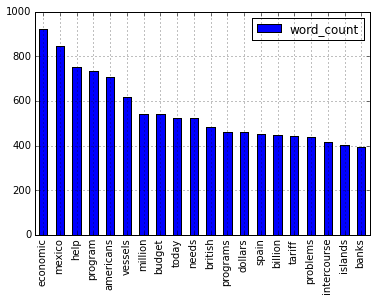

In [38]:
# Visualize the most commonly-used unigrams in aggregate
unigram_df_counts = pd.DataFrame(unigram_df.iloc[:,3:].apply(np.sum, axis=0), columns=['word_count'])
unigram_df_counts_sorted = unigram_df_counts.sort(['word_count'], ascending = [0])[:20]

unigram_df_counts_sorted.plot(kind='bar')

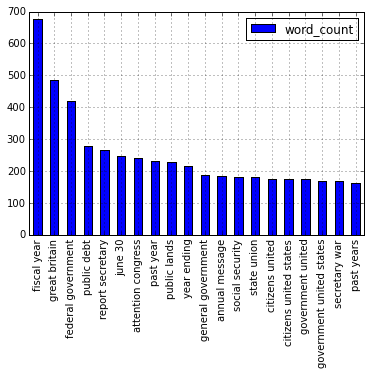

In [39]:
# Visualize the most commonly-used multigrams in aggregate
multigram_df_counts = pd.DataFrame(multigram_df.iloc[:,3:].apply(np.sum, axis=0), columns=['word_count'])
multigram_df_counts_sorted = multigram_df_counts.sort(['word_count'], ascending = [0])[:20]

multigram_df_counts_sorted.plot(kind='bar')

###<i>Method II: <code>idmax()</code></i>

In [47]:
# Group unigram DataFrame values by religion, then visualize most used unigrams by each religious affiliation

# First use groupby to create word counts by religion
unigram_df_religion = unigram_df_all.iloc[:,:-3].drop('party_name', 1).groupby('religion_y').sum() # Change to 'religion_y' in default df parameters
unigram_df_religion = unigram_df_religion.iloc[:, 1:-1]
unigram_df_religion.head()

# Find the most used words by religious affiliation
print unigram_df_religion.idxmax(axis=1)

religion_y
Baptist                     dollars
Congregationalist          economic
Deist                       vessels
Disciples of Christ       americans
Episcopalian              americans
Methodist                    mexico
Presbyterian               economic
Quaker                     economic
Reformed Dutch         corporations
Roman Catholic                 help
Southern Baptist           economic
Unitarian                    tariff
dtype: object


In [51]:
# Group unigram DataFrame values by party, then visualize most used unigrams by each religious affiliation

# First use groupby to create word counts by party
unigram_df_party = unigram_df_all.iloc[:,:-3].drop('religion_y', 1).groupby('party_name').sum()
unigram_df_party = unigram_df_party.iloc[:, 1:-1]
unigram_df_party.head()

# Find the most used words by party affiliation
print unigram_df_party.idxmax(axis=1)

party_name
Democratic                  mexico
Democratic Republican      british
Federalist               gentlemen
Republican                economic
Union                     currency
Whig                        mexico
dtype: object


In [52]:
# Group multigram DataFrame values by religion, then visualize most used unigrams by each religious affiliation

# First use groupby to create word counts by religion
multigram_df_religion = multigram_df_all.iloc[:,:-3].drop('party_name', 1).groupby('religion').sum()
multigram_df_religion = multigram_df_religion.iloc[:, 1:-1]
multigram_df_religion.head()

# Find the most used words by religious affiliation
print multigram_df_religion.idxmax(axis=1)

religion
Baptist                        fiscal year
Congregationalist       federal government
Deist                     peace friendship
Disciples of Christ     federal government
Episcopalian                 great britain
Methodist                      fiscal year
Presbyterian                   fiscal year
Quaker                  federal government
Reformed Dutch         national government
Roman Catholic               latin america
Southern Baptist              human rights
Unitarian                    great britain
dtype: object


In [53]:
# Group multigram DataFrame values by party, then visualize most used unigrams by each religious affiliation

# First use groupby to create word counts by party
multigram_df_party = multigram_df_all.iloc[:,:-3].drop('religion', 1).groupby('party_name').sum()
multigram_df_party = multigram_df_party.iloc[:, 1:-1]
multigram_df_party.head()

# Find the most used words by party affiliation
print multigram_df_party.idxmax(axis=1)

party_name
Democratic                 fiscal year
Democratic Republican    great britain
Federalist                senate house
Republican                 fiscal year
Union                      fiscal year
Whig                     great britain
dtype: object


###<i>Method III: Latent Dirichlet Allocation (LDA)</i>

In [55]:
# Import LDA module
import lda

# Turn the DataFrame into a matrix of numpy arrays, will serve as X in LDA
unigram_df_grouped_matrix = unigram_df_all[1:-3].as_matrix(columns=unigram_df_all.columns.values[1:-3])

# Create new instance of LDA that will group into 20 topics
# and cycle through 1000 iterations
unigram_grouped_model = lda.LDA(n_topics=20, n_iter=1000, random_state=1)
unigram_grouped_model.fit(unigram_df_grouped_matrix)
unigram_grouped_topic_word = unigram_grouped_model.topic_word_
unigram_grouped_n_top_words = 8

#Note: word_list was generated in the above section on stemming
for i, topic_dist in enumerate(unigram_grouped_topic_word):
    unigram_grouped_topic_words = unigram_df_all.columns.values[1:-3][np.argsort(topic_dist)][:-unigram_grouped_n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(unigram_grouped_topic_words)))

TypeError: cannot concatenate 'str' and 'int' objects

In [ ]:
# TODO (P1): Need to fix this - throws error at 38 for some reason...

prez_ids = unigram_df_all['id']

# Find the most prevalent topic among each president's collection of speeches
doc_topic = unigram_grouped_model.doc_topic_
for i in range(len(unigram_df_all)):
    print("{} (top topic: {})".format(prez_ids[i], doc_topic[i].argmax()))

In [ ]:
# TODO (P0): Need to run LabelEncoder on DataFrames
# TODO (P1): Need to try this on multigram non-tfidf DataFrame as well

###<i>Method IV: WordCloud Module</i>

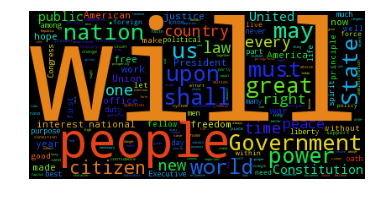

In [41]:
# Import packages
from os import path
from wordcloud import WordCloud

d = path.dirname('../data/')

# WordCloud for Inaugural Addresses

# Read the whole text.
inaugural_text = open(path.join(d, 'inaugural.txt')).read()
inaugural_wordcloud = WordCloud().generate(inaugural_text)

# Open a plot of the generated image.
plt.imshow(inaugural_wordcloud)
plt.axis("off")
plt.show()

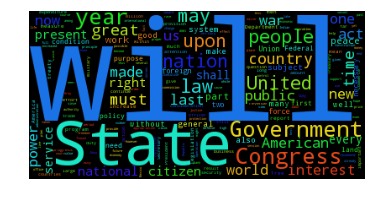

In [42]:
# WordCloud for States of the Union

# Read the whole text.
sotu_text = open(path.join(d, 'sotu.txt')).read()
sotu_wordcloud = WordCloud().generate(sotu_text)

# Open a plot of the generated image.
plt.imshow(sotu_wordcloud)
plt.axis("off")
plt.show()

#Part III: Training and Testing Models

Before running the data through the models below, let's split them up into training and testing sets, with one set for each method used above:

In [1]:
# Import test_train_split
from sklearn.cross_validation import train_test_split

####Unigram Tokens

####Multigram Tokens

####Unigram tf-idf

####Multigram tf-idf

####Stemmed tf-idf

###<i>Model 1: (Multinomial) Naïve Bayes</i>

####Method I: Unigram Tokens

####Method II: Multigram Tokens

####<i>Method III: Unigram tf-idf</i>

####<i>Method VI: Multigram tf-idf</i>

####<i>Method V: Stemmed tf-idf</i>

###<i>Model 2: Random Forests</i>

###<i>Model 3: Other Ensemble Techniques</i>

#Part IV: Applying to Outside Data

###The West Wing <i>Data</i>

###<i>President Obama's Speeches</i>